In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: cleaner visuals
sns.set(style="whitegrid")

In [2]:
# Load the dataset
df = pd.read_csv("reviews.csv")

# Preview the first 5 rows
df.head()



,business_name,author_name,text,photo,rating,rating_category
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu


In [3]:
# Show all column names
print(df.columns)

# Shape of dataset (rows, columns)
print("Shape:", df.shape)

# Missing values per column
print("Missing values:\n", df.isnull().sum())


Index(['business_name', 'author_name', 'text', 'photo', 'rating',
       'rating_category'],
      dtype='object')
Shape: (1100, 6)
Missing values:
 business_name      0
author_name        0
text               0
photo              0
rating             0
rating_category    0
dtype: int64


In [4]:
# Flag reviews that are blank or just whitespace
df['flag_blank'] = df['text'].str.strip() == ''

In [5]:
# Flag reviews with fewer than 10 characters
df['flag_too_short'] = df['text'].str.len() < 10

In [6]:
# Flag duplicate reviews (case sensitive)
df['flag_duplicate'] = df.duplicated(subset=['text'], keep=False)


In [7]:
df[['flag_blank', 'flag_too_short', 'flag_duplicate']].sum()


flag_blank         0
flag_too_short    13
flag_duplicate    19
dtype: int64

In [8]:
df['flag_any_issue'] = df[['flag_blank', 'flag_too_short', 'flag_duplicate']].any(axis=1)


In [9]:
df['flag_any_issue'].sum()


np.int64(24)

In [10]:
# Group by business and count flagged reviews
flagged_by_business = df[df['flag_any_issue']].groupby('business_name').size().sort_values(ascending=False)

# Show top 10
flagged_by_business.head(10)


business_name
Nazar Cafe                 2
Tatbak                     2
Bilice                     1
Bogazkoy Restaurant        1
Anzelha                    1
Askin Tostevi              1
Duveroglu                  1
Cici Tantuni               1
Fikret Balik Restaurant    1
Gold Semaver               1
dtype: int64

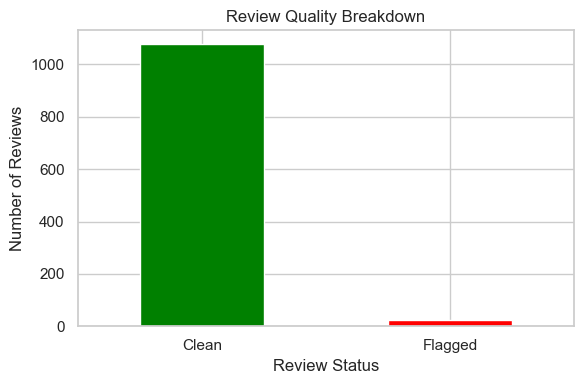

In [11]:
import matplotlib.pyplot as plt

# Count reviews with and without issues
quality_counts = df['flag_any_issue'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
quality_counts.plot(kind='bar', color=['green', 'red'])
plt.xticks(ticks=[0,1], labels=['Clean', 'Flagged'], rotation=0)
plt.title('Review Quality Breakdown')
plt.ylabel('Number of Reviews')
plt.xlabel('Review Status')
plt.tight_layout()
plt.show()


In [12]:
df.to_csv("cleaned_reviews_with_flags.csv", index=False)
